> 프리티스케일 점수를 제외한 시각데이터 피처 EDA와 전처리 작업 코드입니다. 

> 참고 : Cell의 Output에 VideoId, ChannelId 등 개인정보가 포함된 경우 개인정보 보호를 위해 Output을 삭제하였습니다.

## 1. 데이터 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("merged_data.csv")
data.head()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelId           2184 non-null   object 
 1   videoId             2184 non-null   object 
 2   duration            2184 non-null   float64
 3   viewCount           2184 non-null   int64  
 4   paidBadge           2184 non-null   int64  
 5   bday                2184 non-null   float64
 6   subs                2184 non-null   float64
 7   gender              2184 non-null   int64  
 8   prettyScale         2184 non-null   float64
 9   publishedAt         2184 non-null   float64
 10  videoTitle          2184 non-null   float64
 11  tag                 2184 non-null   float64
 12  viewCount_log       2184 non-null   float64
 13  face_area_ratio     2184 non-null   float64
 14  face_detect         2184 non-null   int64  
 15  Smile_Value         2184 non-null   bool   
 16  text_r

> 결측치는 없는 것으로 확인, 13-18번 6개 Row에 대한 시각화 진행

## 2. 시각화, EDA, 전처리

In [3]:
df = data[['face_area_ratio', 'face_detect', 'Smile_Value', 'text_rate1', 'minmax_text_length', 'text_present', 'viewCount_log']]

In [4]:
df

,face_area_ratio,face_detect,Smile_Value,text_rate1,minmax_text_length,text_present,viewCount_log
0,0.293723,1,False,0.005363,0.038462,1.0,11.640351
1,0.598028,1,False,0.055652,0.000000,1.0,12.074288
2,0.771986,1,False,0.075014,0.000000,1.0,13.000444
3,0.468354,1,False,0.000000,0.000000,0.0,13.913043
4,0.351904,2,False,0.093097,0.000000,1.0,14.324532
...,...,...,...,...,...,...,...
2179,0.236850,1,True,0.067265,0.000000,1.0,8.796339
2180,0.319601,1,False,0.251320,0.076923,1.0,5.796058
2181,0.000000,0,False,0.097229,0.115385,1.0,10.253581
2182,0.000000,0,False,0.040347,0.115385,1.0,7.593374


### (1) Smile_Value
* False가 True의 약 2.5배 정도 
* smile value와 조회수 사이에 상관관계가 시각화로 잘 보이지는 않음.
* False 0 True 1로 일단 인코딩 -> 후에 음의 상관계수가 보이면 False 1 True 0으로 바꾸는 걸로

In [5]:
df['Smile_Value'].value_counts()

Smile_Value
False    1589
True      595
Name: count, dtype: int64

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: ylabel='viewCount_log'>

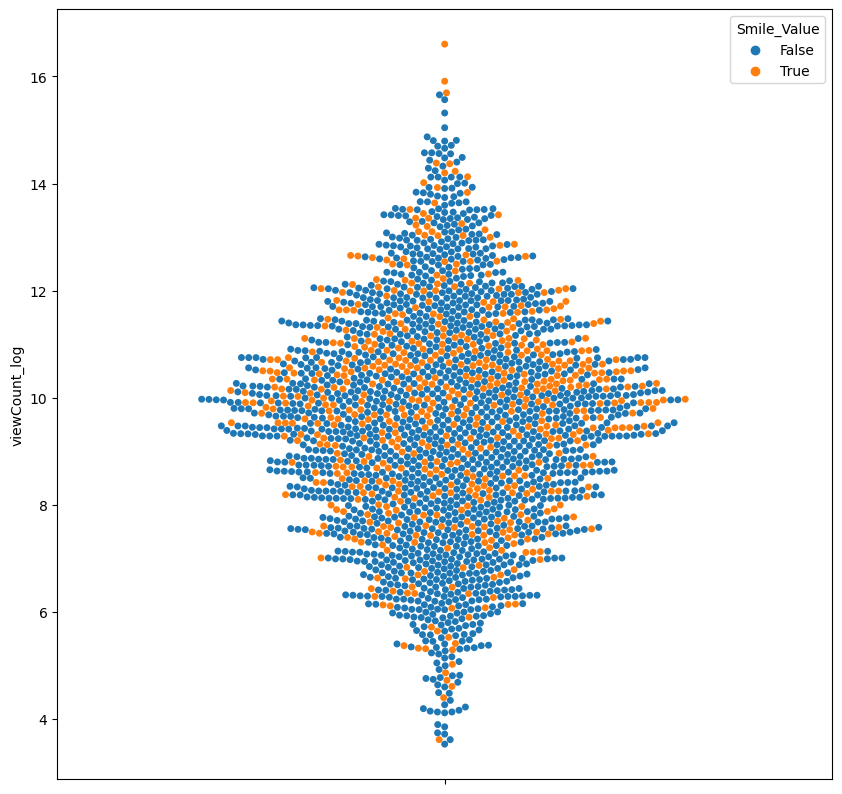

In [9]:
plt.figure(figsize  = (10, 10))

sns.swarmplot(data = df,
             y = 'viewCount_log',
             hue = 'Smile_Value')

In [47]:
df['Smile_Value'] = df['Smile_Value'].apply(lambda x: 0 if x == False else 1)

/var/folders/58/1kqz1nb13r3_qtkz3d9bbjfr0000gn/T/ipykernel_32423/1279915766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smile_Value'] = df['Smile_Value'].apply(lambda x: 0 if x == False else 1)


In [49]:
# 데이터 원본에도 적용

data['Smile_Value'] = df['Smile_Value']

### (2) face_area_ratio

* 0부터 1 사이의 값, 편향도 심하지 않고 이상치도 크게 없는 관계로 따로 정규화 하지 않고 그대로 두겠음

In [10]:
df['face_area_ratio'].describe()

count    2184.000000
mean        0.356255
std         0.257867
min         0.000000
25%         0.168121
50%         0.307415
75%         0.527772
max         1.000000
Name: face_area_ratio, dtype: float64

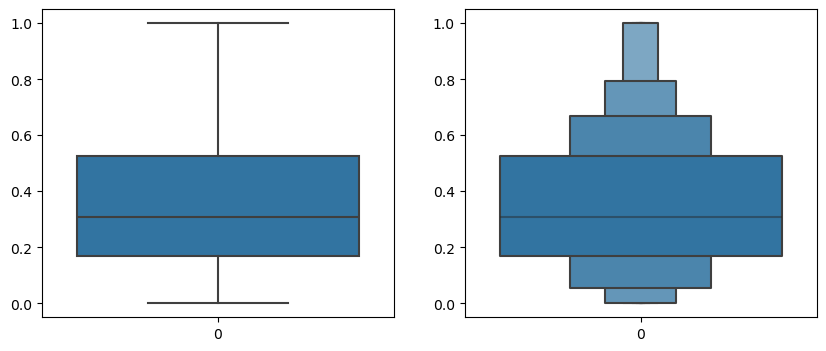

In [12]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(df['face_area_ratio'])

plt.subplot(1, 2, 2)
sns.boxenplot(df['face_area_ratio'])

plt.show()

<Axes: xlabel='face_area_ratio', ylabel='Count'>

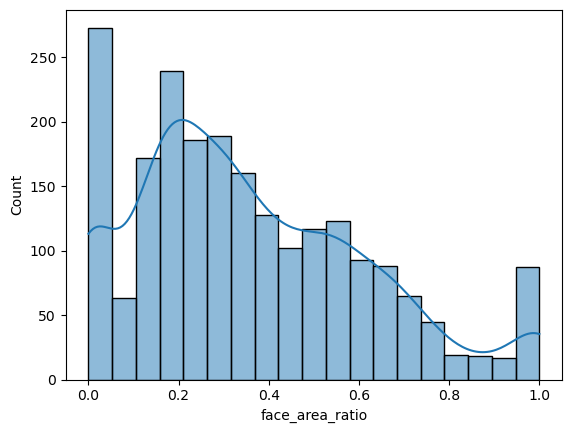

In [14]:
sns.histplot(df['face_area_ratio'], kde = True)

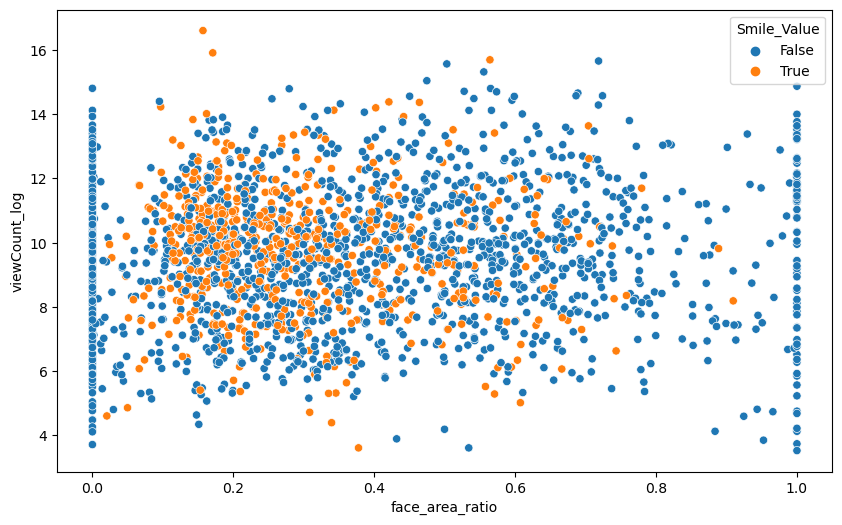

In [26]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = df,
                x = 'face_area_ratio',
                y = 'viewCount_log',
                hue = 'Smile_Value')

plt.show()

### (3) face_detect
* 얼굴이 1개인 경우가 압도적으로 많고 조회수 상위 역시 얼굴이 1개인 경우에 조금 더 많음
* 얼굴이 0, 2, 3개인 경우에도 특별히 조회수에 편향된 결과가 보이지는 않는다
* 일단 놔두겠음

In [16]:
df['face_detect'].value_counts()

face_detect
1    1911
0     233
2      35
3       5
Name: count, dtype: int64

<Axes: xlabel='face_detect', ylabel='viewCount_log'>

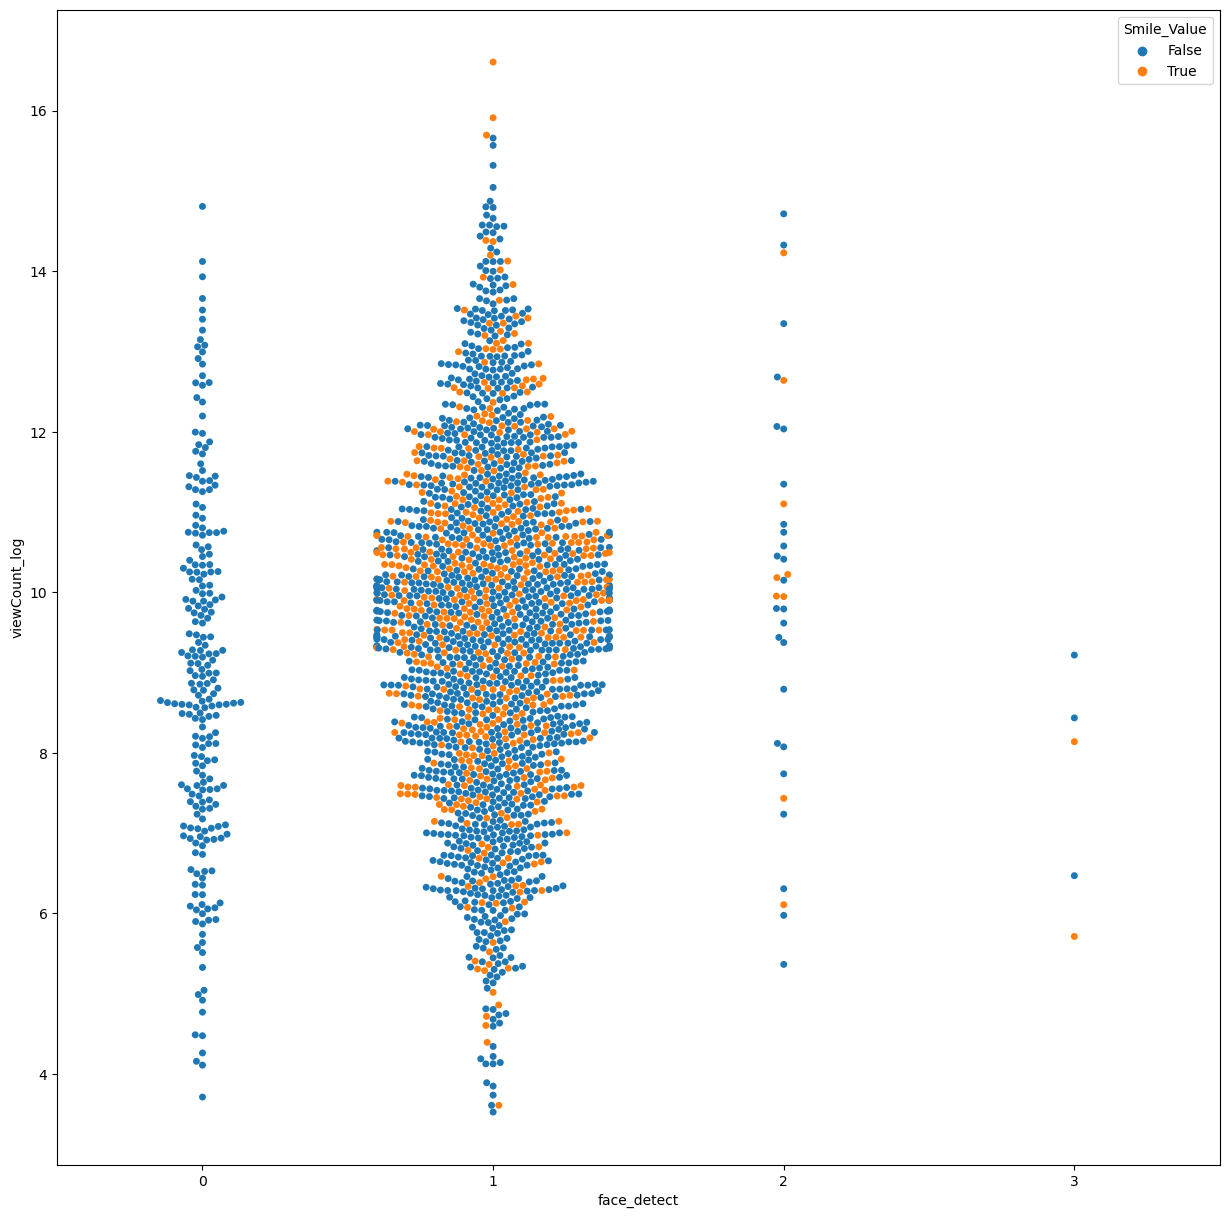

In [19]:
plt.figure(figsize  = (15, 15))

sns.swarmplot(data = df,
             x = 'face_detect',
             y = 'viewCount_log',
             hue = 'Smile_Value')

### (4) minmax_text_length
* 이거 이상치 확인 안하고 그냥 바로 minmax 때려서 들어온 것 같음, 편향 심각 -> (슬 추가) 나중에 모델링 후 SHAP결과 기여도 최하위로 변수 삭제처리했음!

In [28]:
df['minmax_text_length'].describe()

count    2184.000000
mean        0.058538
std         0.086912
min         0.000000
25%         0.000000
50%         0.038462
75%         0.076923
max         1.000000
Name: minmax_text_length, dtype: float64

<Axes: xlabel='minmax_text_length', ylabel='Count'>

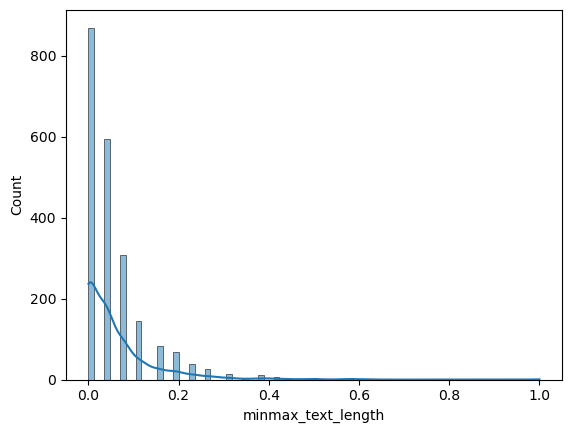

In [30]:
sns.histplot(df['minmax_text_length'], kde = True)

### (5) text_rate1
* 0부터 0.5 사이의 값 -> 이상치 65개 있어서 전부 평균값으로 바꿔줬음 -> 일단 MinMaxScaler 적용하지 않고 일단 그냥 둬보겠음

In [32]:
df['text_rate1'].describe()

count    2184.000000
mean        0.077842
std         0.066726
min         0.000000
25%         0.029720
50%         0.062720
75%         0.111254
max         0.481133
Name: text_rate1, dtype: float64

<Axes: xlabel='text_rate1', ylabel='Count'>

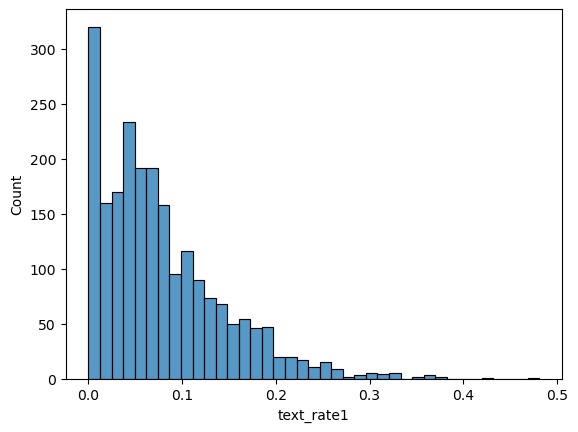

In [33]:
sns.histplot(df['text_rate1'])

<Axes: >

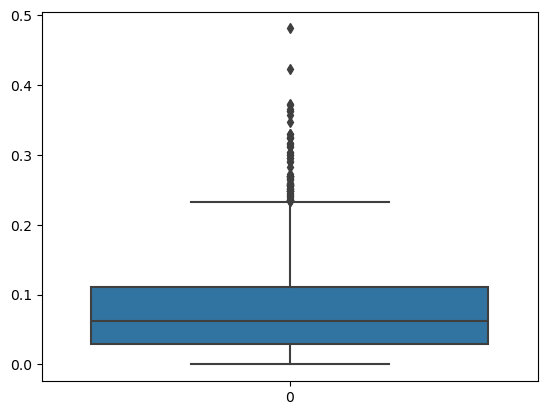

In [35]:
sns.boxplot(df['text_rate1'])

In [80]:
# 이상치 구하는 함수 작성
import numpy as np

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)
    print(q1, q2, q3)

    iqr = q3 - q1
    print("------ IQR : ", iqr, " ------")

    outliers_list = df[df[col] > q3 + 1.5 * iqr].index.tolist()
    return outliers_list

In [38]:
len(outliers(df, 'text_rate1'))

0.02972015951595155 0.0627200220022002 0.11125378162816275
------ IQR :  0.08153362211221121  ------


65

> 이상치 65개 확인 -> 평균값으로 변경

In [40]:
df['text_rate1'].mean()

0.07784187845295515

In [41]:
for index in outliers(df, 'text_rate1'):
    df.at[index, "text_rate1"] = df['text_rate1'].mean()

0.02972015951595155 0.0627200220022002 0.11125378162816275
------ IQR :  0.08153362211221121  ------


In [42]:
len(outliers(df, 'text_rate1'))

0.02972015951595155 0.0627200220022002 0.11125378162816275
------ IQR :  0.08153362211221121  ------


0

> 이상치 0개 확인

<Axes: xlabel='text_rate1', ylabel='Count'>

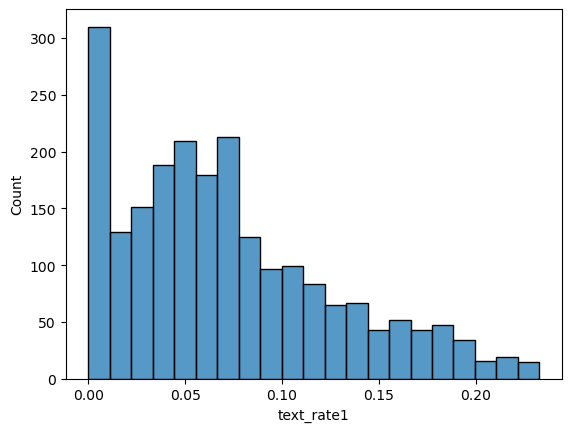

In [43]:
sns.histplot(df['text_rate1'])

In [45]:
# 데이터 원본에도 적용
data['text_rate1'] = df['text_rate1']

## 3. 상관계수 확인

In [ ]:
data

In [51]:
X_features = data.drop(['channelId', 'videoId', 'viewCount', 'viewCount_log'], axis = 1)

In [52]:
y_label = data['viewCount_log']

In [ ]:
pd.concat([X_features, y_label], axis = 1).corr()

In [57]:
pd.concat([X_features, y_label], axis = 1).to_csv("add_vision.csv", index = False)

In [60]:
data.to_csv("add_vision_with_videoId.csv", index = False)

## 4. HSV 추가 전처리
* 이상치 몇개만 평균값으로 바꾸고 Minmax

In [61]:
hsv = pd.read_csv("data_with_hsv.csv")

In [ ]:
hsv.head(2)

In [63]:
hsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   videoId             2184 non-null   object 
 1   Mean_H              2184 non-null   float64
 2   Mean_S              2184 non-null   float64
 3   Mean_V              2184 non-null   float64
 4   channelId           2184 non-null   object 
 5   duration            2184 non-null   float64
 6   viewCount           2184 non-null   int64  
 7   paidBadge           2184 non-null   int64  
 8   bday                2184 non-null   float64
 9   subs                2184 non-null   float64
 10  gender              2184 non-null   int64  
 11  prettyScale         2184 non-null   float64
 12  publishedAt         2184 non-null   float64
 13  videoTitle          2184 non-null   float64
 14  tag                 2184 non-null   float64
 15  viewCount_log       2184 non-null   float64
 16  face_a

In [66]:
# 결측치 없음

# H

hsv['Mean_H'].describe()

count    2184.00000
mean       63.13141
std        34.19903
min         6.00000
25%        36.00000
50%        57.00000
75%        84.00000
max       172.00000
Name: Mean_H, dtype: float64

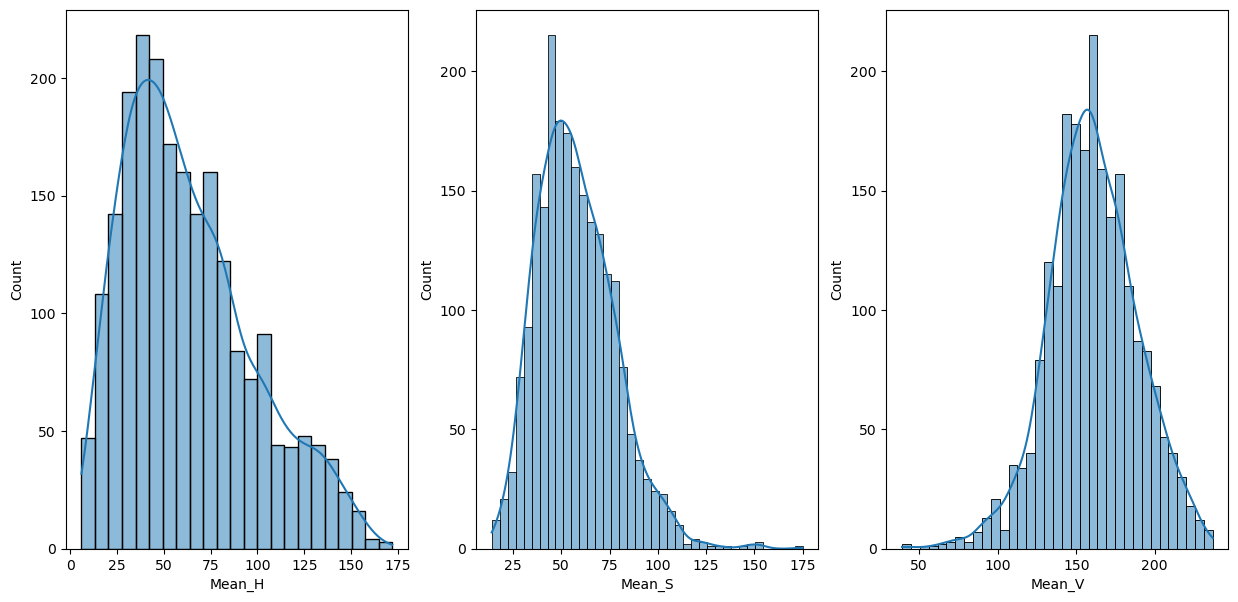

In [68]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 3, 1)
sns.histplot(hsv['Mean_H'], kde = True)

plt.subplot(1, 3, 2)
sns.histplot(hsv['Mean_S'], kde = True)

plt.subplot(1, 3, 3)
sns.histplot(hsv['Mean_V'], kde = True)

plt.show()

In [ ]:
hsv

In [85]:
len(outliers(hsv, 'Mean_H'))

36.0 57.0 84.0
------ IQR :  48.0  ------


8

In [84]:
len(outliers(hsv, 'Mean_S'))

43.0 55.0 70.0
------ IQR :  27.0  ------


24

In [86]:
len(outliers(hsv, 'Mean_V'))

142.0 160.0 179.0
------ IQR :  37.0  ------


4

In [87]:
for index in outliers(hsv, 'Mean_H'):
    hsv.at[index, 'Mean_H'] = hsv['Mean_H'].mean()

36.0 57.0 84.0
------ IQR :  48.0  ------


In [88]:
for index in outliers(hsv, 'Mean_S'):
    hsv.at[index, 'Mean_S'] = hsv['Mean_S'].mean()

43.0 55.0 70.0
------ IQR :  27.0  ------


In [89]:
for index in outliers(hsv, 'Mean_V'):
    hsv.at[index, 'Mean_V'] = hsv['Mean_V'].mean()

142.0 160.0 179.0
------ IQR :  37.0  ------


In [91]:
len(outliers(hsv, 'Mean_H'))

36.0 57.0 83.0
------ IQR :  47.0  ------


9

In [92]:
len(outliers(hsv, 'Mean_S'))

43.0 55.0 69.0
------ IQR :  26.0  ------


5

In [93]:
len(outliers(hsv, 'Mean_V'))

142.0 160.0 179.0
------ IQR :  37.0  ------


0

In [95]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

normalized = pd.DataFrame(minmax_scaler.fit_transform(hsv[['Mean_H', 'Mean_S', 'Mean_V']]),
                                                  columns = ['Mean_H', 'Mean_S', 'Mean_V'])

normalized.head()

,Mean_H,Mean_S,Mean_V
0,0.620000,0.455848,0.635897
1,0.440000,0.427083,0.594872
2,0.200000,0.270833,0.661538
3,0.786667,0.343750,0.512821
4,0.453333,0.781250,0.630769


In [96]:
for column in ['Mean_H', 'Mean_S', 'Mean_V']:
    hsv[column] = normalized[column]

In [ ]:
hsv

In [98]:
hsv.to_csv("vision_final.csv", index = False)